In [4]:
import torch
import sbibm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import pickle
import os

sns.set_theme()

In [5]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/tmp/ipykernel_3679879/548677536.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Ts, y=dists, ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_3679879/548677536.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Ts, y=dists, ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_3679879/548677536.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Ts, y=dists, ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_3679879/548677536.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Ts, y=dists, ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_3679879/548677536.py:43: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Ts, y=dists, ax=ax, legend=False, palette="flare", lw=4)
/tmp/ipykernel_3679879/548677536.py:43: UserW

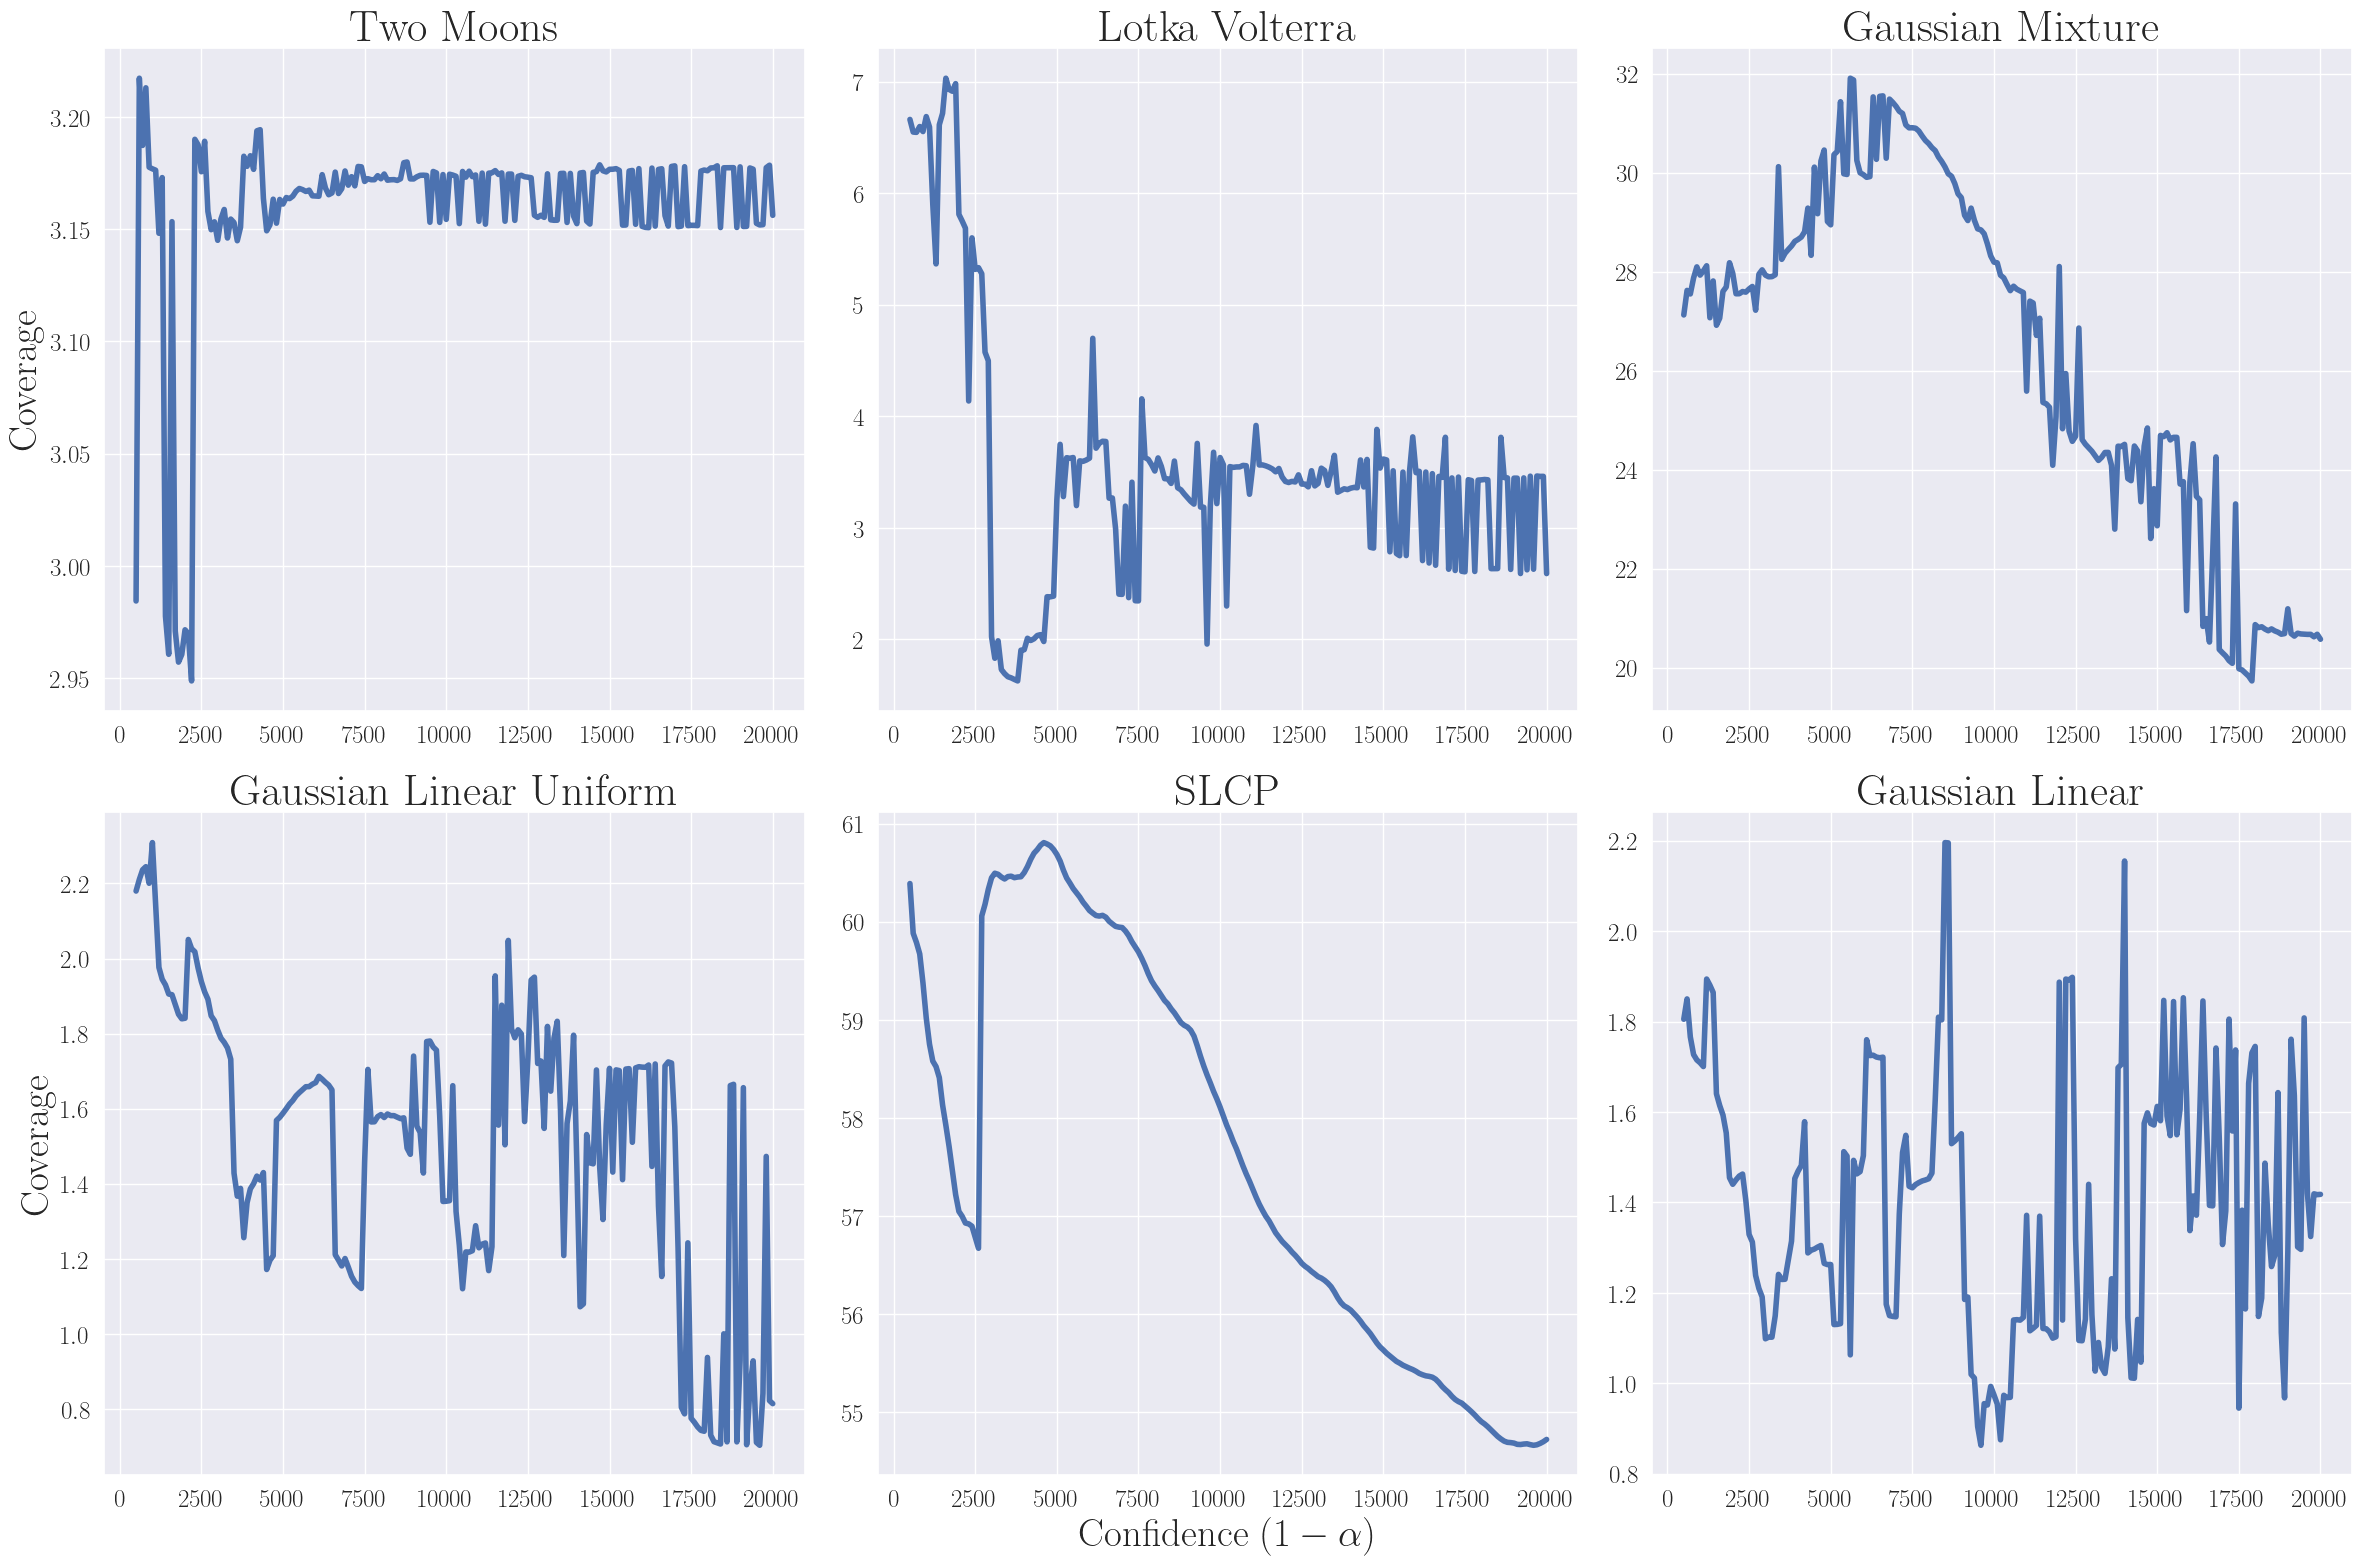

In [32]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

task_names = [
    "two_moons",
    "lotka_volterra",
    "gaussian_mixture",
    "gaussian_linear_uniform",
    "slcp",
    "gaussian_linear",
]

task_name_titles = [
    'Two Moons',
    'Lotka Volterra',
    'Gaussian Mixture',
    'Gaussian Linear Uniform',
    'SLCP',
    'Gaussian Linear',
]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24,16))
# axs[0].set_ylabel("$\mathbb{E}_X[\mathcal{L}(\cdot)]$",fontsize=24)
for i, task_name in enumerate(task_names):
    ax = axs[i // 3, i - 3 * (i // 3)]
    
    ax.set_title(task_name_titles[i], fontsize=32)
    
    if i == 4:
        ax.set_xlabel(r"Distance $d(\Xi, \widehat{\Xi})$",fontsize=28)
    else:
        ax.set_xlabel(" ")

    if i == 0 or i == 3:
        ax.set_ylabel("Diffusion Iterate $T$",fontsize=28)
    else:
        ax.set_ylabel(" ")
    
    with open(os.path.join("results", "dists", f"{task_name}.pkl"), "rb") as f:
        Ts, dists = pickle.load(f)
    sns.lineplot(x=Ts, y=dists, ax=ax, legend=False, palette="flare", lw=4)
    
    # window_size = 10
    # rolling_dists = moving_average(np.array(dists), n=window_size)
    # sns.lineplot(x=Ts[window_size - 1:], y=rolling_dists, ax=ax, legend=False, palette="flare", lw=4, dashes=(4, 2))
plt.tight_layout()
plt.savefig(f"distances.png")

In [19]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
   
r = moving_average(np.array(dists))
len(r)

196

/tmp/ipykernel_3679879/1896566255.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=range(len(r)), y=r, legend=False, palette="flare", lw=4)


<Axes: >

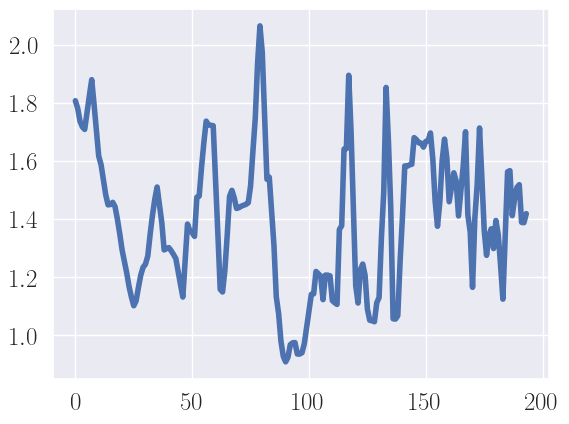

In [16]:
sns.lineplot(x=range(len(r)), y=r, legend=False, palette="flare", lw=4)